In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_parquet('../data/data_prep.parquet')

In [5]:
df_train = pd.read_parquet('../data/df_train.parquet')
df_val = pd.read_parquet('../data/df_val.parquet')
df_test = pd.read_parquet('../data/df_test.parquet')
df_full_train = pd.read_parquet('../data/df_full_train.parquet')

In [6]:
y_train = np.loadtxt('../data/y_train')
y_val = np.loadtxt('../data/y_val')
y_test = np.loadtxt('../data/y_test')

X_train = np.loadtxt('../data/X_train')
X_val = np.loadtxt('../data/X_val')

### Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899994, 0.2045765 , 0.21225399, ..., 0.13642888, 0.79979376,
       0.83742684])

In [9]:
churn_decision = (y_pred >= 0.5)

In [10]:
(y_val == churn_decision).mean()

0.8034066713981547

In [11]:
# Number of correct predictions

(y_val == churn_decision).sum()

1132

In [12]:
# Accuracy: Number of correct predictions / Total Validation Set

((y_val == churn_decision).sum()) / len(y_val)

0.8034066713981547

### Changing the Threshold of 0.5

In [13]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [14]:
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


#### Plot Accuracy with different thresholds

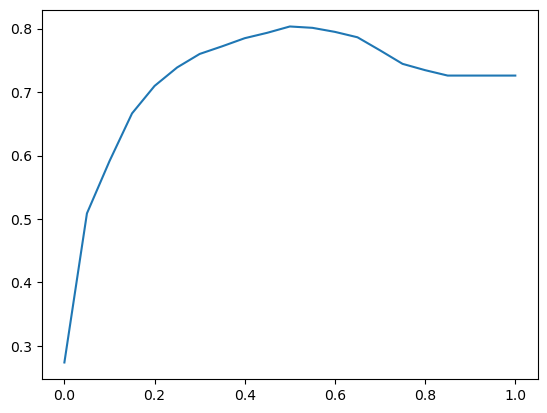

In [15]:
plt.plot(thresholds, scores)
plt.show()

### Ussing sklearn accuracy score

In [16]:
accuracy_score(y_val, y_pred >=0.5)

0.8034066713981547

In [17]:
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


Accuracy no es la mejor medida en este caso, pues un modelo con threshold de 1 tiene un accuracy alto (72.6%). Esto debido a que hay un desbalanceo de clase, donde solo el 27% de los usuarios ha hecho churn. Es decir, dado que el accuracy mide la cantidad de predicciones correctas, independiente de la clase, el hecho de tener una clase mayoritaria va a llevar a que el modelo genere predicciones correctas en esa clase mayoritaria. Debido a que el caso de uso implica predecir correctamente la clase minoritaria, accuracy no es la medida apropiada.

## Confusion Table

La tabla de confusión es una forma de medir los distintos tipos de errores y decisiones correctas que pueden tomar los clasificadores binarios. Teniendo en cuenta esta información, es posible evaluar la calidad del modelo mediante distintas estrategias.

Cuando se trata de predicciones de un modelo de clasificación binaria, cada predicción se clasifica en una de las cuatro categorías siguientes: 
* La predicción es que el cliente se dará de baja. Esto se conoce como la **clase Positiva** 
    * Y el cliente realmente abandonó - Conocido como Verdadero Positivo (TP) 
    * Pero el cliente realmente no abandonó - Conocido como Falso Positivo (FP) 

* La predicción es que el cliente NO abandonará - Esto se conoce como la **clase Negativa** 
    * El cliente no abandonó - Verdadero Negativo (TN) 
    * El cliente abandonó - Falso Negativo (FN)

<img src="../images/confusion_matrix.png">

In [18]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [19]:
t = 0.5

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [30]:
true_positive = (predict_positive & actual_positive).sum()
true_negative = (predict_negative & actual_negative).sum()

print('True Positive:', true_positive)
print('True Negative:', true_negative)

True Positive: 210
True Negative: 922


In [32]:
false_positive = (predict_positive & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()

print('False Positive:', false_positive)
print('False Negative:', false_negative)

False Positive: 101
False Negative: 176


In [33]:
# Confusion matrix using numpy

confusion_matrix = np.array([
    [true_negative, false_positive],
    [false_negative, true_positive]
])

print(confusion_matrix)

[[922 101]
 [176 210]]


In [36]:
# Confusion matrix %

(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])